#S&P500 Data Science Project

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import ConfusionMatrixDisplay, r2_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
sp500 = pd.read_csv('/content/drive/MyDrive/מחנה מדעי הנתונים לנוער תל אביב תשפד/S&P500 - Sheet.csv')
sp500['Change'] = (sp500['Close'].diff() > 0).astype(int)
sp500['Change'] = sp500['Change'].fillna(0).astype(int)
sp500.to_csv('/content/drive/MyDrive/מחנה מדעי הנתונים לנוער תל אביב תשפד/S&P500 - Sheet.csv', index=False)
sp500.head(-1)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Date,Close,Change
0,18/11/1996 16:00:00,737.02,0
1,19/11/1996 16:00:00,742.16,1
2,21/11/1996 16:00:00,742.72,1
3,22/11/1996 16:00:00,748.70,1
4,25/11/1996 16:00:00,757.03,1
...,...,...,...
6959,23/07/2024 16:00:00,5555.74,0
6960,24/07/2024 16:00:00,5427.13,0
6961,25/07/2024 16:00:00,5399.22,0
6962,26/07/2024 16:00:00,5459.10,1


<ipython-input-41-8a8f94627e13>:2: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  sp500['Date'] = pd.to_datetime(sp500['Date'])  # Ensure the Date column is in datetime format


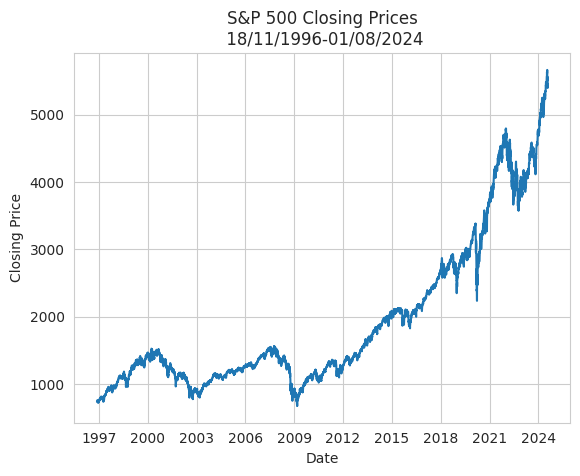

In [ ]:
sp500 = pd.read_csv('/content/drive/MyDrive/S&P500 - Sheet.csv')  # Reload the original data
sp500['Date'] = pd.to_datetime(sp500['Date'])  # Ensure the Date column is in datetime format
sns.set_style("whitegrid")
sns.lineplot(x='Date', y='Close', data=sp500)
years = pd.date_range(start='1997-01-01', end='2024-01-01', freq='3YS')
plt.gca().set_xticks(years)
plt.gca().set_xticklabels([year.strftime('%Y') for year in years])
plt.title('S&P 500 Closing Prices\n 18/11/1996-01/08/2024')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()

מאז 2009 יש עלייה דרסטית למרות הירידות.

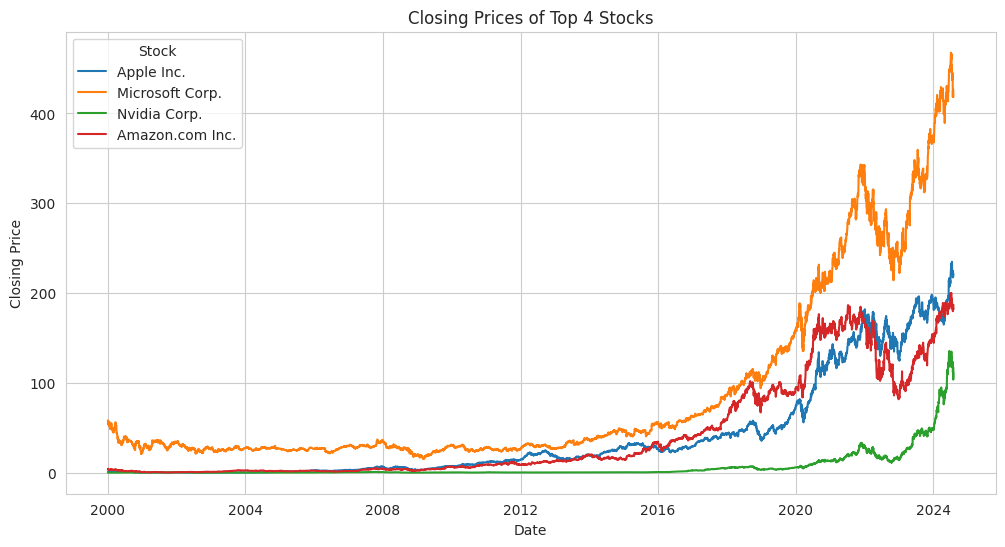

In [ ]:
top4 = pd.read_csv('/content/drive/MyDrive/מחנה מדעי הנתונים לנוער תל אביב תשפד/Top4 - S&P500.csv')
top4['Date'] = pd.to_datetime(top4['Date'], dayfirst=True)
top4.set_index('Date', inplace=True)
top4_melted = pd.melt(top4.reset_index(), id_vars='Date', value_vars=top4.columns, var_name='Stock', value_name='Price')
plt.figure(figsize=(12, 6))
sns.lineplot(data=top4_melted, x='Date', y='Price', hue='Stock')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Closing Prices of Top 4 Stocks')
plt.grid(True)
plt.show()

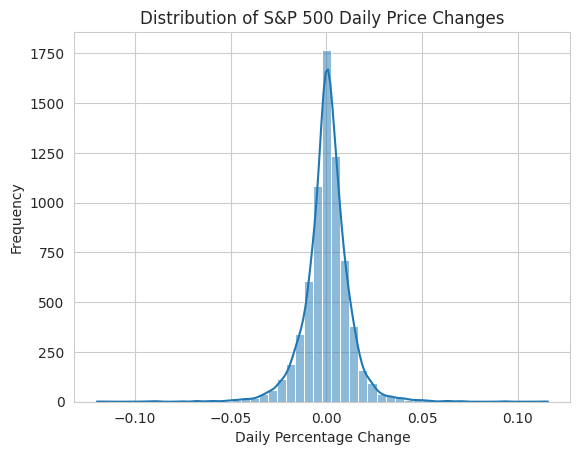

In [ ]:
sns.histplot(sp500['Close'].pct_change(), bins=50, kde=True)
plt.xlabel('Daily Percentage Change')
plt.ylabel('Frequency')
plt.title('Distribution of S&P 500 Daily Price Changes')
plt.show()

בגרף רואים שבדרך כלל השינוי הוא מינימלי בין יום ליום.

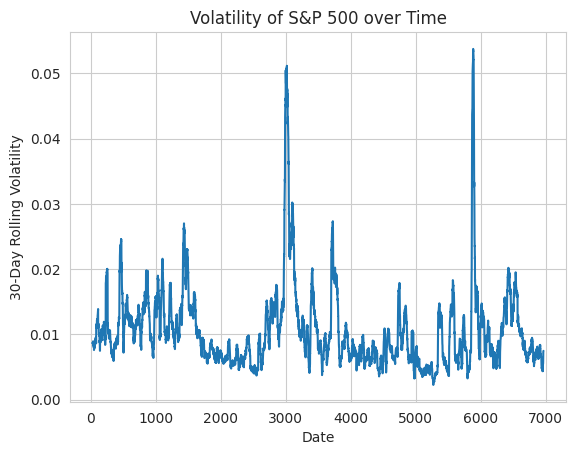

In [ ]:
sp500['Rolling_Volatility'] = sp500['Close'].pct_change().rolling(window=30).std()
sns.lineplot(x=sp500.index, y='Rolling_Volatility', data=sp500)
plt.xlabel('Date')
plt.ylabel('30-Day Rolling Volatility')
plt.title('Volatility of S&P 500 over Time')
plt.show()

בגרף רואים את ההשפעות של הקורונה ב-2020 ושל הבמיתון הגדול בשנת 2008.

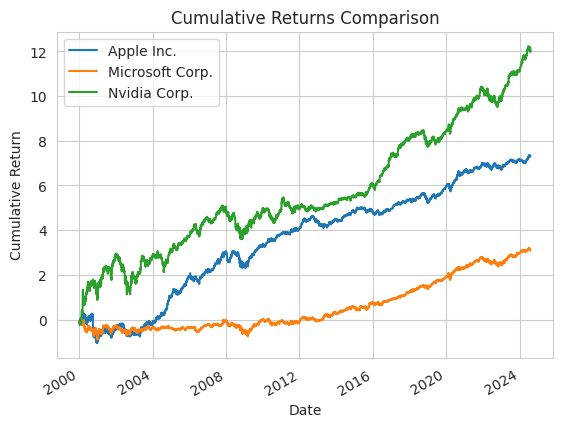

In [ ]:
top4 = pd.read_csv('/content/drive/MyDrive/מחנה מדעי הנתונים לנוער תל אביב תשפד/Top4 - S&P500.csv')
top4['Date'] = pd.to_datetime(top4['Date'], dayfirst=True)
top4.set_index('Date', inplace=True)
indices = pd.concat([top4['Apple Inc.'], top4['Microsoft Corp.'], top4['Nvidia Corp.']], axis=1)
indices.columns = ['Apple Inc.', 'Microsoft Corp.', 'Nvidia Corp.']
indices.pct_change().cumsum().plot()
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.title('Cumulative Returns Comparison')
plt.legend()
plt.show()

בגרף רואים שהחזר השקעה בחברת נוידיה עלה בשנים האחרונות.

<ipython-input-46-eaf4ed910292>:2: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  sp500['Date'] = pd.to_datetime(sp500['Date'])


R² on test set: 0.7191238589194286
R²: 0.71481313846627


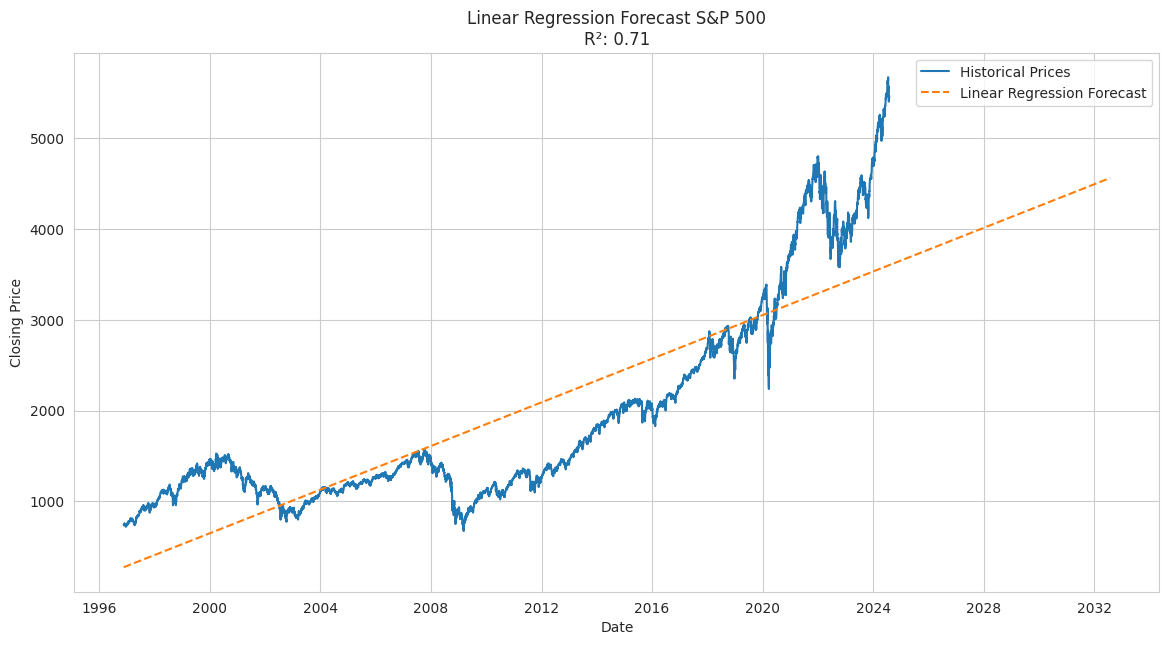

In [ ]:
sp500 = pd.read_csv('/content/drive/MyDrive/S&P500 - Sheet.csv')
sp500['Date'] = pd.to_datetime(sp500['Date'])
sp500.set_index('Date', inplace=True)
sp500['Date_ordinal'] = sp500.index.map(pd.Timestamp.toordinal)
X = sp500['Date_ordinal'].values.reshape(-1, 1)
y = sp500['Close'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f'R² on test set: {r2}')
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
r2 = r2_score(y, y_pred)
print(f'R²: {r2}')
future_dates = pd.date_range(start=sp500.index[-1], periods=365*8, freq='D')
future_dates_ordinal = future_dates.map(pd.Timestamp.toordinal).values.reshape(-1, 1)
future_predictions = model.predict(future_dates_ordinal)
all_dates = np.concatenate([sp500.index.values, future_dates])
all_predictions = np.concatenate([y_pred, future_predictions])
plt.figure(figsize=(14, 7))
sns.lineplot(x=sp500.index, y=sp500['Close'], label='Historical Prices')
sns.lineplot(x=all_dates, y=all_predictions, label='Linear Regression Forecast', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title(f'Linear Regression Forecast S&P 500\nR²: {r2:.2f}')
plt.legend()
plt.show()

<ipython-input-50-6141e60d2e7d>:3: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  sp500['Date'] = pd.to_datetime(sp500['Date'])


R² on test set: 0.94
R²: 0.94


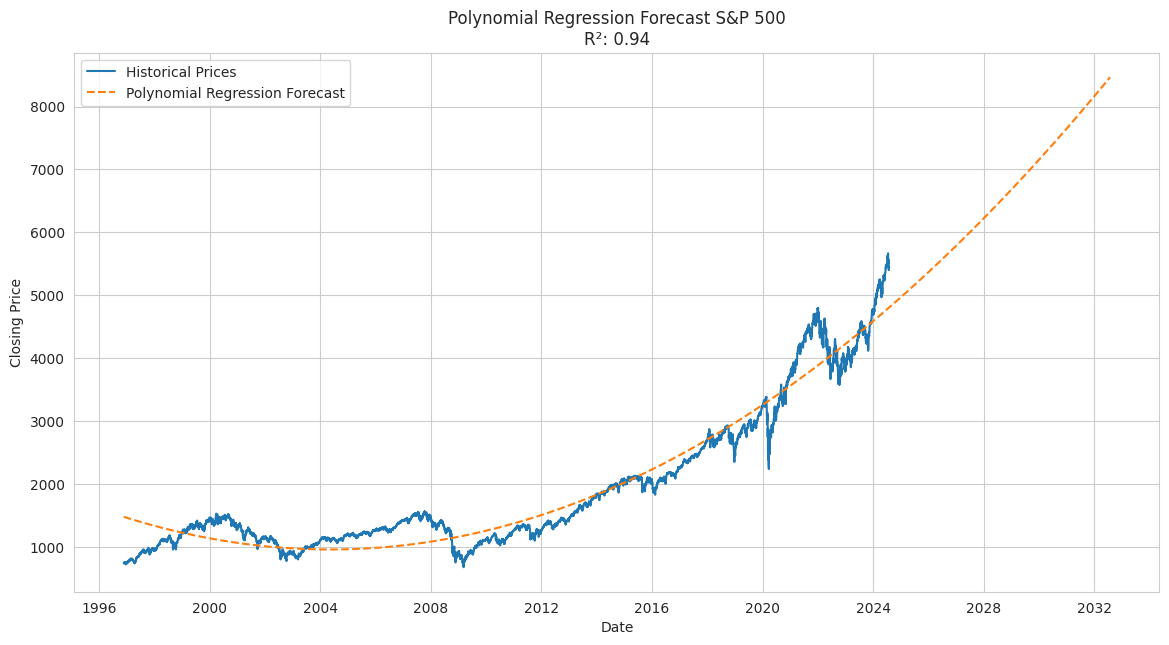

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
sp500 = pd.read_csv('/content/drive/MyDrive/מחנה מדעי הנתונים לנוער תל אביב תשפד/S&P500 - Sheet.csv')
sp500['Date'] = pd.to_datetime(sp500['Date'])
sp500.set_index('Date', inplace=True)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f'R² on test set: {r2:.2f}')
sp500['Date_ordinal'] = sp500.index.map(pd.Timestamp.toordinal)
X = sp500['Date_ordinal'].values.reshape(-1, 1)
y = sp500['Close'].values
polynomial_features = PolynomialFeatures(degree=3)  # Adjust degree as needed
X_poly = polynomial_features.fit_transform(X)
model = LinearRegression()
model.fit(X_poly, y)
y_pred = model.predict(X_poly)
r2 = r2_score(y, y_pred)
print(f'R²: {r2:.2f}')
future_dates = pd.date_range(start=sp500.index[-1] + pd.Timedelta(days=1), periods=365*8, freq='D')
future_dates_ordinal = future_dates.map(pd.Timestamp.toordinal).values.reshape(-1, 1)
future_dates_poly = polynomial_features.transform(future_dates_ordinal)
future_predictions = model.predict(future_dates_poly)
all_dates = np.concatenate([sp500.index, future_dates])
all_predictions = np.concatenate([y_pred, future_predictions])
plt.figure(figsize=(14, 7))
sns.lineplot(x=sp500.index, y=sp500['Close'], label='Historical Prices')
sns.lineplot(x=all_dates, y=all_predictions, label='Polynomial Regression Forecast', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title(f'Polynomial Regression Forecast S&P 500\nR²: {r2:.2f}')
plt.legend()
plt.show()

Accuracy: 0.51


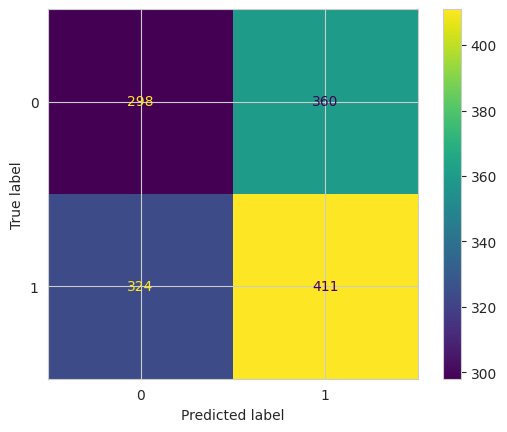

In [ ]:
X = sp500[['Close']].values
y = sp500['Change'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
knn = KNeighborsClassifier(n_neighbors=5)  # Adjust n_neighbors as needed
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()